# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

DecisionTreeClassifier()    

df = pd.read_csv('demo01.csv',na_values=('NA','',' ','nan','NAN','na'))

df_Y = df.mau
df_X = df.drop('mau',axis = 1)

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.3, random_state=123)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

Acurácia da Base de Treino: 98.18%


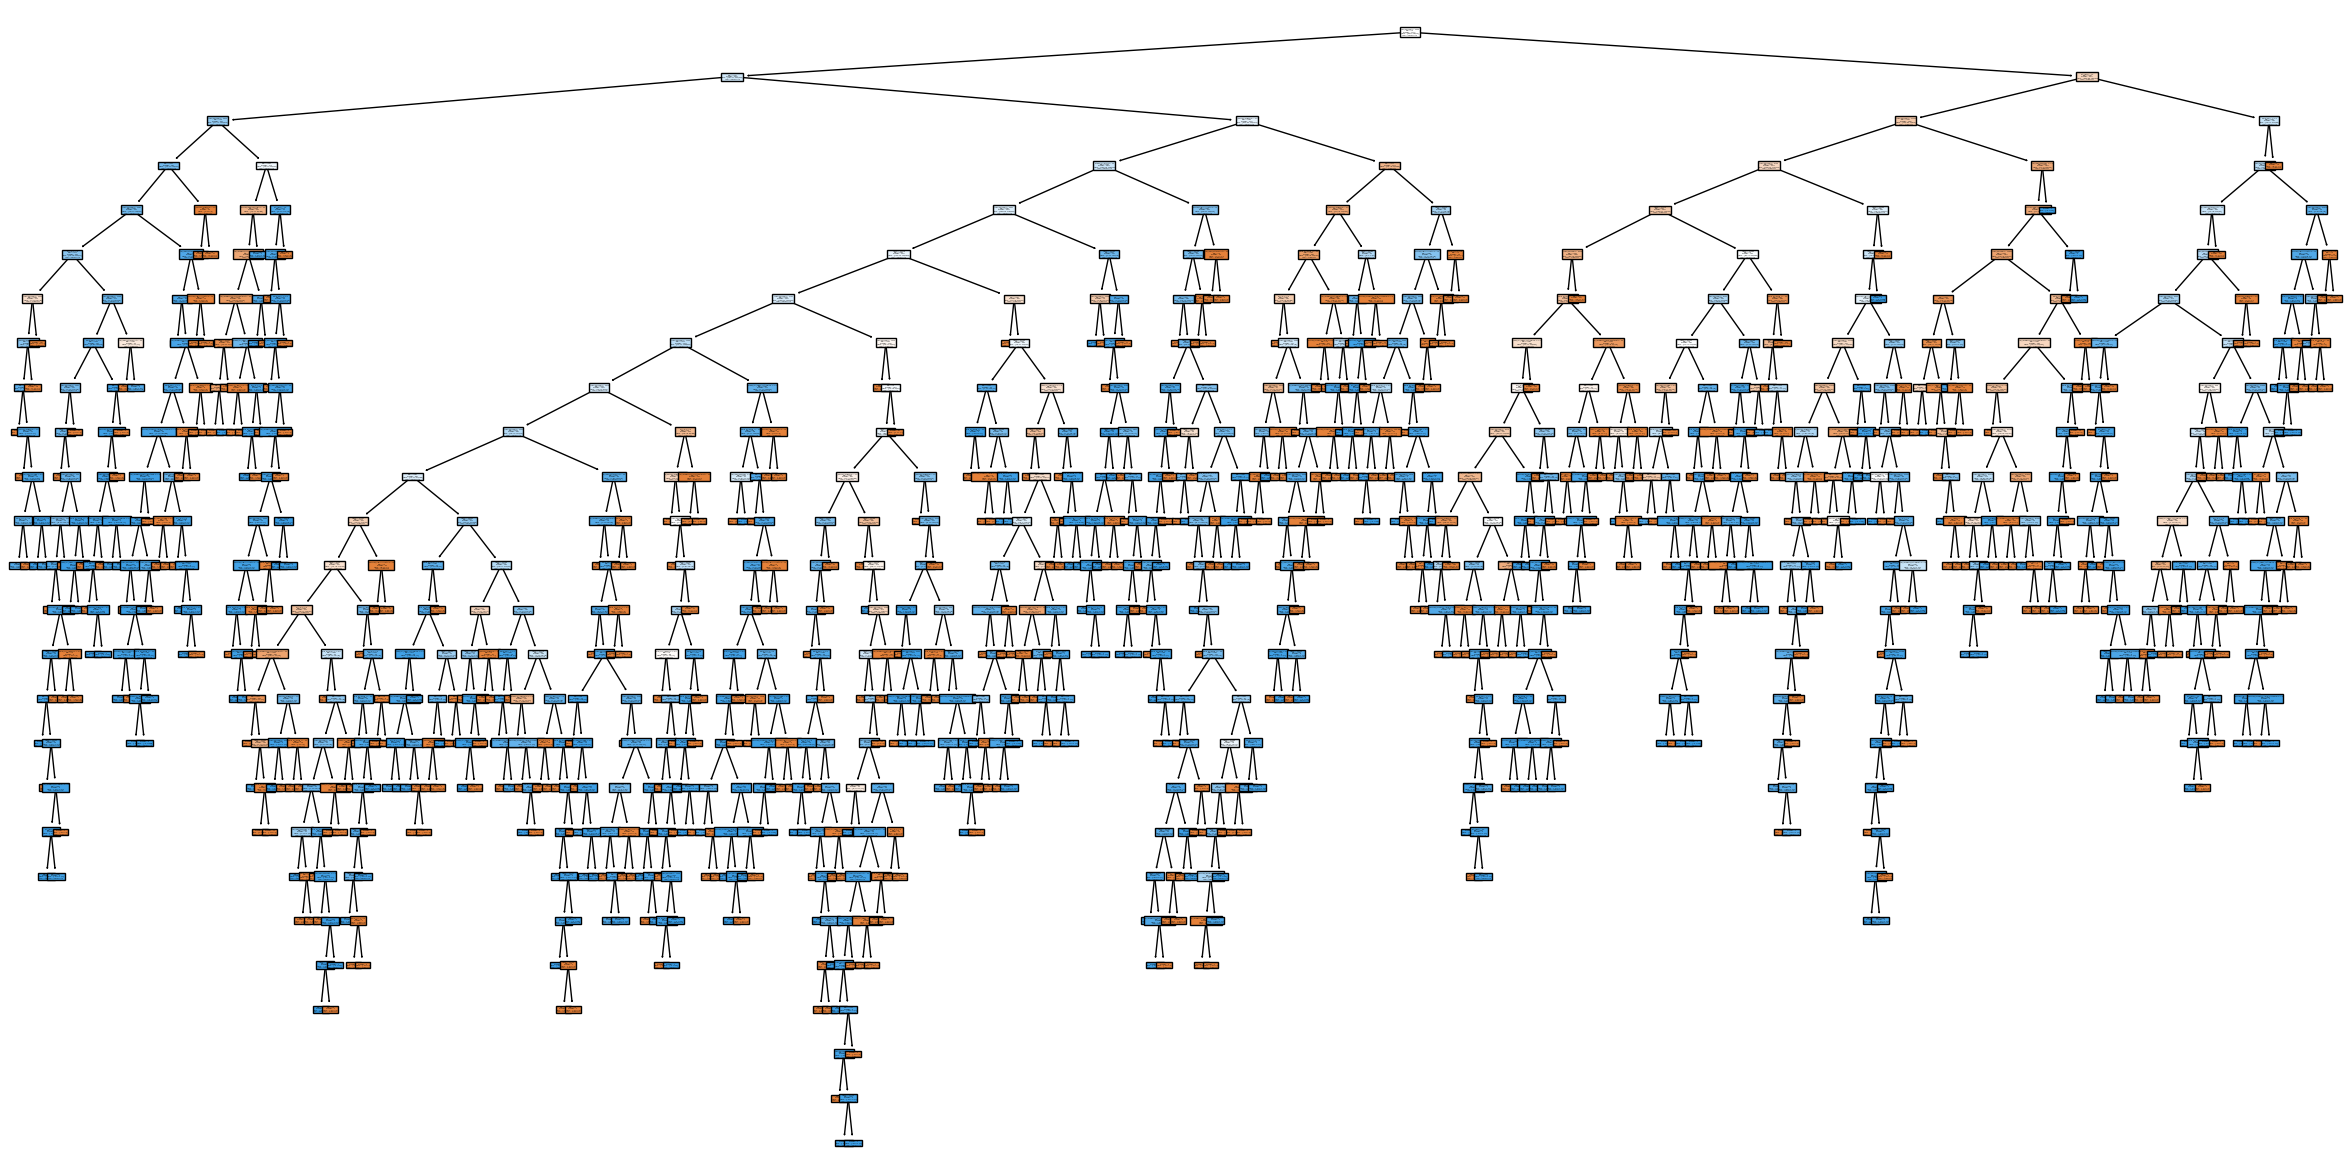

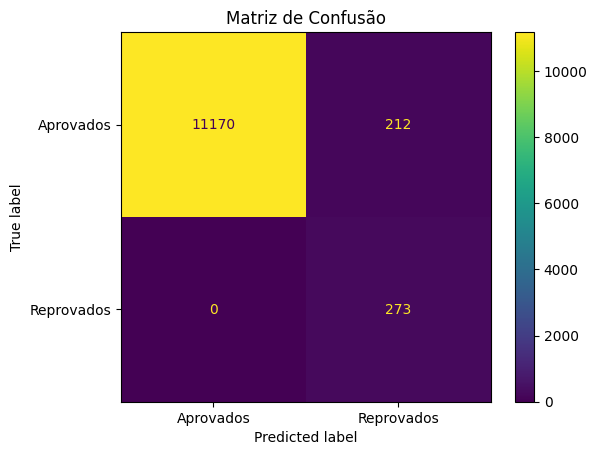

In [94]:
clf = DecisionTreeClassifier(random_state=100,class_weight='balanced')
clf = clf.fit(X_train,y_train)
plt.figure(figsize=(30,15))
plot_tree(clf,          
          filled=True, 
          class_names=['Adimplente','Inadimplente'],
          feature_names=X_train.columns);

y_pred  = clf.predict(X_train)

cm = confusion_matrix(y_train, y_pred,labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()
plt.title('Matriz de Confusão')
acc = accuracy_score(y_train, y_pred )
print(f"Acurácia da Base de Treino: {acc * 100:.2f}%")


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

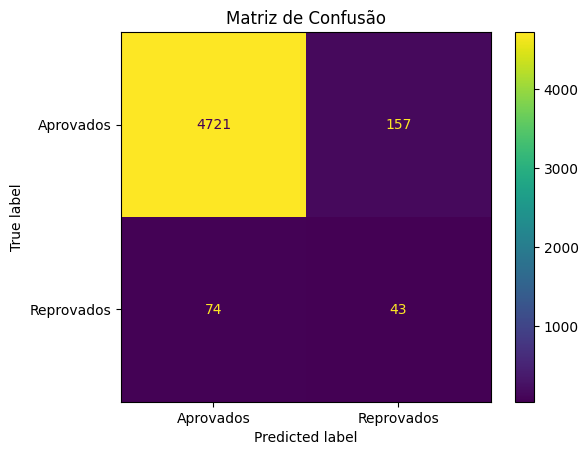

Acurácia da Base de Teste: 95.38%


In [95]:
y_pred2  = clf.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2,labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Aprovados', 'Reprovados'])
disp.plot()
plt.title('Matriz de Confusão')
plt.show()
acc2 = accuracy_score(y_test, y_pred2 )
print(f"Acurácia da Base de Teste: {acc2 * 100:.2f}%")

In [96]:
diff_accs = acc2 - acc
print(f"Diferença entres acurácias da Base de Treino e Teste (diff = teste - treino): {diff_accs * 100:.2f}%")

Diferença entres acurácias da Base de Treino e Teste (diff = teste - treino): -2.81%


Acurácia da Base de Treino com Profundidade 10 e Mínimo de Observação por folha de 5: 80.10%


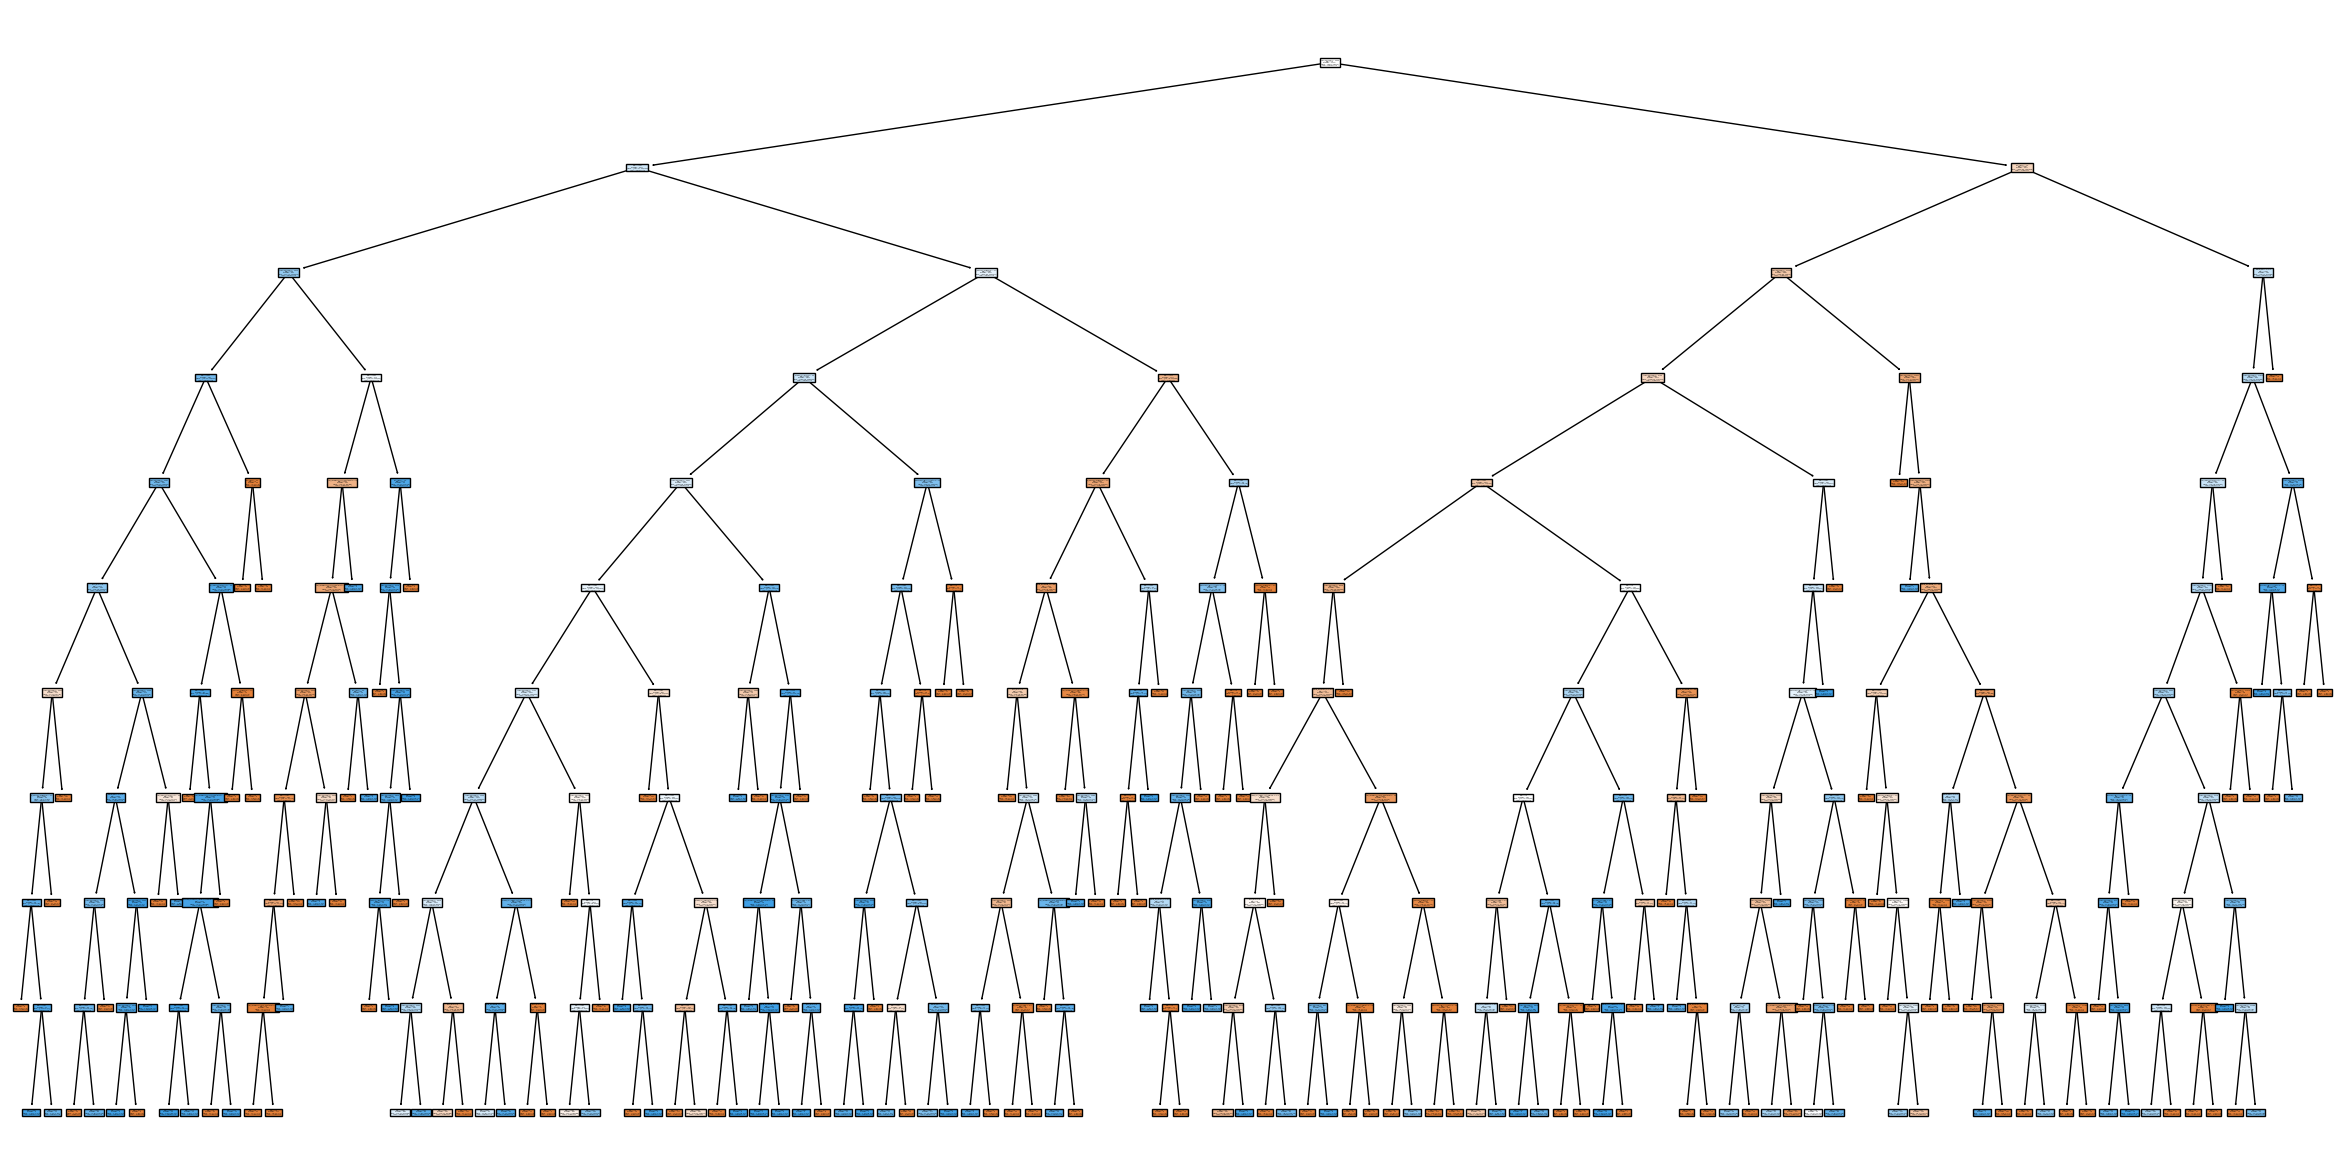

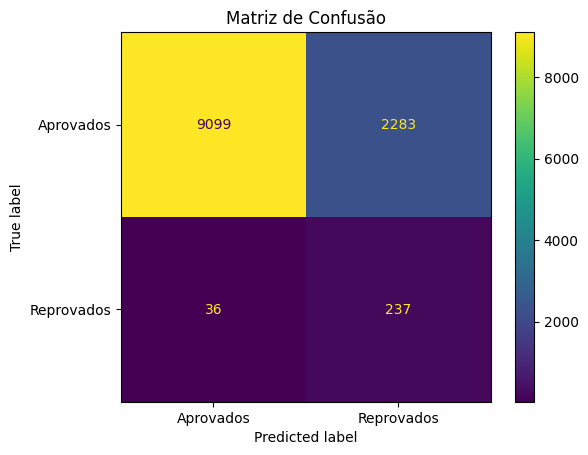

In [97]:
clf2 = DecisionTreeClassifier(max_depth=10,min_samples_leaf=5,random_state=123,class_weight='balanced')
clf2 = clf2.fit(X_train,y_train)

plt.figure(figsize=(30,15))
plot_tree(clf2,          
          filled=True, 
          class_names=['Adimplente','Inadimplente'],
          feature_names=X_train.columns);

y_pred  = clf2.predict(X_train)

cm2 = confusion_matrix(y_train, y_pred,labels=clf2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Aprovados', 'Reprovados'])
disp.plot()
plt.title('Matriz de Confusão')
acc3 = accuracy_score(y_train, y_pred )
print(f"Acurácia da Base de Treino com Profundidade 10 e Mínimo de Observação por folha de 5: {acc3 * 100:.2f}%")

In [92]:
print(f"Proporção de proponentes classificados como mau: {(cm[1,1]/np.sum(cm)) * 100:.2f}%")

Proporção de proponentes classificados como mau: 2.03%


In [98]:
print(f"Acurácia no caso de todos classificados como bom: {(cm[0,0]/np.sum(cm)) * 100:.2f}%")

Acurácia no caso de todos classificados como bons: 95.84%
